Notebook for the analysis of models with reconstruction errors. Expect CSV with columns:
`y_true`, `y_pred`, `losses`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics

In [2]:
DATAPATH = '/home/kinit/VNET-NAnoDec/src/anomaly_detection/model/results/basic_bigsubset_10e_results.csv'

PERCENTILES=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

In [3]:
def print_roc(y_true, y_pred) -> None:
    sklearn.metrics.RocCurveDisplay.from_predictions(y_true, y_pred, color="darkorange", name='Autoencoder')

    plt.plot([0, 1], [0, 1], "darkgray", linestyle='dashed', label="Chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics")
    plt.legend()
    plt.show()

In [4]:
data = pd.read_csv(DATAPATH)
data.columns

Index(['y_true', 'y_preds', 'losses'], dtype='object')

In [5]:
# Give outputs a brief analysis
display(data['y_true'].value_counts())
display(data['y_preds'].value_counts())

0    16667000
1      842177
Name: y_true, dtype: int64

0    16506426
1     1002751
Name: y_preds, dtype: int64

In [6]:
# Obtain 95-percentile of losses for histogram printing
q95 = data['losses'].quantile(q=0.95)
display(q95)

1.3222272199999985

Text(0.5, 1.0, 'Losses histogram for all labels')

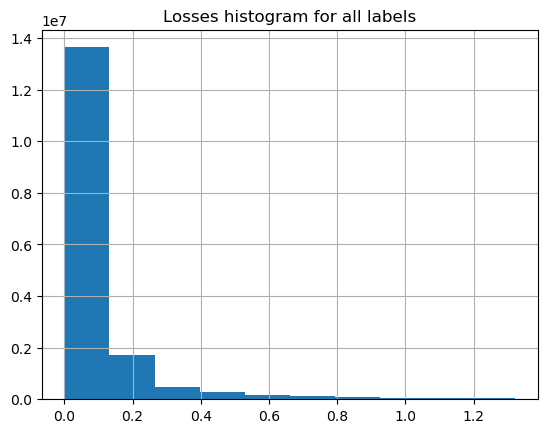

In [7]:
data[data['losses'] < q95]['losses'].hist()
plt.title("Losses histogram for all labels")

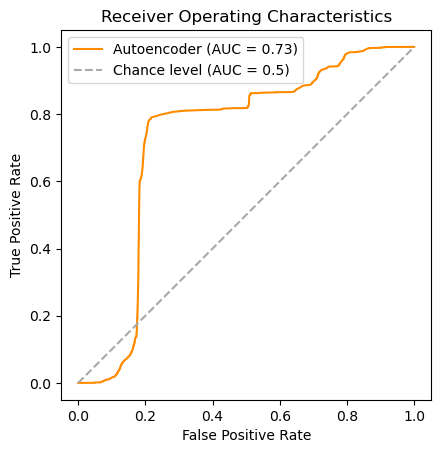

In [8]:
# Generate and print ROC curve
print_roc(data['y_true'], data['losses'])

In [9]:
# Plot KDE (probability density function) plot
losses_background = data[data['y_true'] == 0]['losses']
losses_malicious  = data[data['y_true'] == 1]['losses']

In [10]:
# Perform value clipping above 1.0 value for better displayability
CLIP_VALUE = 1.0

losses_background = losses_background.apply(lambda x: min(CLIP_VALUE, x))
losses_malicious  = losses_malicious.apply(lambda x: min(CLIP_VALUE, x))

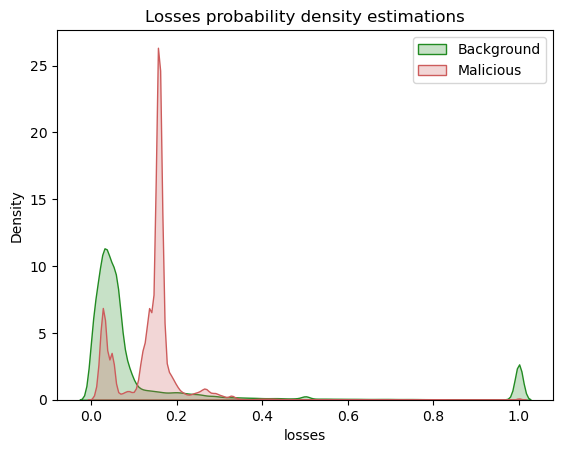

In [11]:
sns.kdeplot(losses_background, fill=True, color='forestgreen', label='Background')
sns.kdeplot(losses_malicious, fill=True, color='indianred', label='Malicious')

plt.title("Losses probability density estimations")
plt.legend()
plt.show()

In [12]:
# Determine example losses
data[data['y_true'] == 1]['losses']

23          0.158300
67          0.120114
151         0.157093
200         0.157397
221         0.157397
              ...   
17509070    0.154137
17509081    0.048635
17509093    0.159547
17509121    0.086699
17509162    0.159500
Name: losses, Length: 842177, dtype: float64

In [13]:
# Obtain percentiles for more interesting quantiles for benign graffic
data[data['y_true'] == 0]['losses'].describe(percentiles=PERCENTILES).apply(lambda x: format(x, 'f'))

count      16667000.000000
mean            476.595346
std          807929.146443
min               0.000237
25%               0.027052
50%               0.049640
75%               0.086875
80%               0.127453
85%               0.211178
90%               0.396004
91%               0.486894
92%               0.563069
93%               0.729825
94%               1.002857
95%               1.447489
96%               2.295339
97%               3.809956
98%              11.362589
99%              30.292027
max      3249111600.000000
Name: losses, dtype: object

In [14]:
data[data['y_true'] == 1]['losses'].describe(percentiles=PERCENTILES).apply(lambda x: format(x, 'f'))

count    842177.000000
mean          0.145583
std           0.359340
min           0.008347
25%           0.121160
50%           0.155637
75%           0.161049
80%           0.163349
85%           0.167571
90%           0.189796
91%           0.197273
92%           0.208296
93%           0.230100
94%           0.250694
95%           0.264436
96%           0.277519
97%           0.297534
98%           0.333508
99%           0.502641
max         309.076750
Name: losses, dtype: object

In [15]:
# Get how big of a portion of benign/malicious losses constitute to all samples above
# the threshold, say 0.5
ratio_background = len(data[(data['y_true'] == 0) & (data['losses'] > 0.5)]) / len(data)
ratio_malicious  = len(data[(data['y_true'] == 1) & (data['losses'] > 0.5)]) / len(data)

display(ratio_background)
display(ratio_malicious)

0.08407768109260647

0.00048271829109957596